In [1]:
pip install pandas pmdarima matplotlib


  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 10.4 MB/s eta 0:00:00 0:00:01
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pmdarima as pm
import os

In [21]:
file_paths = ['/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Atlanta_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Charlotte_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Cincinnati_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Cincinnati_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Indianapolis_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Providence_combined.csv',
              '/Users/timwillard/Desktop/group3-project2-ml/Data/Clean/combined/Tampa_combined.csv'
              ]

In [29]:
# Loop through each file, load the CSV, and apply ARIMA
for file_path in file_paths:
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        target_column = 'MeanSalePrice' 
        model= pm.auto_arima(data[target_column], seasonal=True, m=12, trace=True)
        print(f"\n--- ARIMA model summary for {os.path.basename(file_path)} ---")
        print(model.summary())
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3960.912, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3930.185, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3936.335, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3967.463, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3997.057, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3950.698, Time=0.62 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3974.392, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3945.384, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3930.955, Time=1.00 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3974.372, Time=0.31 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3933.281, Time=0.10 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept

In [30]:
predictions = model.predict(n_periods=12)
print(f"\n--- ARIMA model summary for {os.path.basename(file_path)} ---")
print(predictions)


--- ARIMA model summary for Tampa_combined.csv ---
195    476373.0
196    479051.0
197    481729.0
198    484407.0
199    487085.0
200    489763.0
201    492441.0
202    495119.0
203    497797.0
204    500475.0
205    503153.0
206    505831.0
dtype: float64


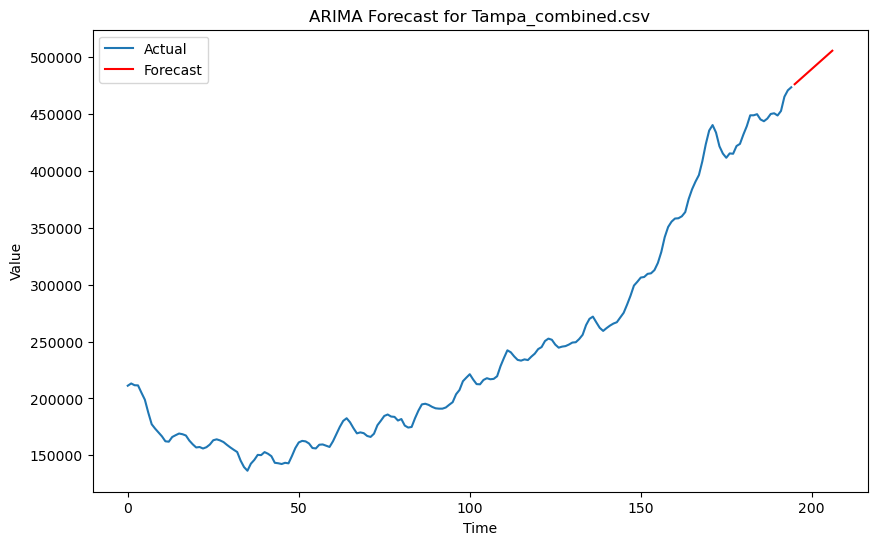

In [31]:
import matplotlib.pyplot as plt

# Inside your loop, after making predictions
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(data[target_column], label='Actual')

# Plot the forecast
plt.plot(range(len(data[target_column]), len(data[target_column]) + 12), predictions, label='Forecast', color='red')

# Add title and labels
plt.title(f"ARIMA Forecast for {os.path.basename(file_path)}")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()
